# SHOPPING-MALL CUSTOMERS USING PYTHON (Project by David Olutunde Daniel)
In the first step of this data science project, we will perform data exploration. We will import the essential packages required for this role and then read our data. Finally, we will go through the input data to gain necessary insights about it.

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
customer_data=pd.read_csv("/home/psalmist/Documents/Python/Data_Science_Project/archive/Mall_Customers.csv")
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# print the dimensions of the dataframe
print(customer_data.shape)

(200, 5)


In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data['Age'].mean()


38.85

In [6]:
customer_data['Age'].median()


36.0

In [7]:
customer_data['Age'].min()


18

In [8]:
customer_data['Age'].max()

70

In [9]:
customer_data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [10]:
customer_data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [11]:
#To obtain the description for the spending score
customer_data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [12]:
#In short
customer_data[["Age","Annual Income (k$)", "Spending Score (1-100)"]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


"Median" is the median earnings of full-time, year-round workers.

"P25th" is the 25th percentile of earnings.

"P75th" is the 75th percentile of earnings.

In [13]:
#What is the average age for male versus female Customers?
customer_data[["Genre", "Age"]].groupby("Genre").mean()
 #the groupby() method is applied on the Genre column to make a group per category. The average age for each gender is calculated and returned.

,Age
Genre,
Female,38.098214
Male,39.806818


In [14]:
#Here, the mean method is applied to each column containing numerical columns

customer_data.groupby("Genre").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [15]:
customer_data.groupby("Genre")["Age"].mean()   #Since we are only concerned with the average of the Genre

Genre
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [16]:
#What is the mean Spending Score price for each of the sex and Age combinations?
customer_data.groupby(["Genre", "Age"])["Spending Score (1-100)"].mean()

Genre   Age
Female  18     48.00
        19     52.00
        20     40.50
        21     63.25
        22     65.50
               ...  
Male    66     48.00
        67     38.00
        68     43.00
        69     46.00
        70     55.50
Name: Spending Score (1-100), Length: 87, dtype: float64

In [17]:
#What is the number of the Male and Female Customer in each of the dataset?
customer_data["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [18]:
#Or use
customer_data.groupby("Genre")["Genre"].count()

Genre
Female    112
Male       88
Name: Genre, dtype: int64

Aggregation statistics can be calculated on entire columns or rows

groupby provides the power of the split-apply-combine pattern

value_counts is a convenient shortcut to count the number of entries in each category of a variable

Text(0.5, 0, 'Frequecy')

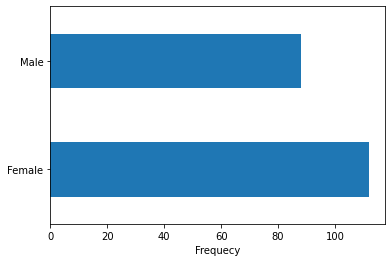

In [19]:
#customer_data.plot(x ='Genre', y='', kind = 'bar')
#plt.show()

customer_data['Genre'].value_counts().plot(kind='barh')
plt.xlabel("Frequecy")


From the above bargraph, we observe that the number of females is higher than the males. Now, let us visualize a pie chart to observe the ratio of male and female distribution.

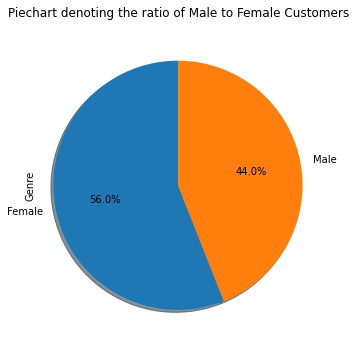

In [20]:
# autopct create %, start angle represent starting point
customer_data['Genre'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Piechart denoting the ratio of Male to Female Customers')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

# Visualization of Age Distribution

Text(0.5, 1.0, 'Histogram for the ages of Customers that use the Mall')

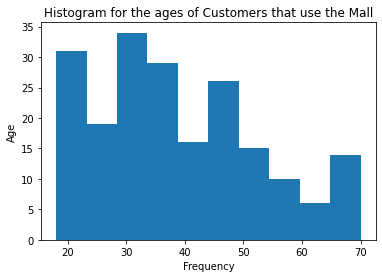

In [21]:
customer_data['Age'].plot(kind="hist")
plt.xlabel("Frequency")
plt.ylabel("Age")
plt.title('Histogram for the ages of Customers that use the Mall')

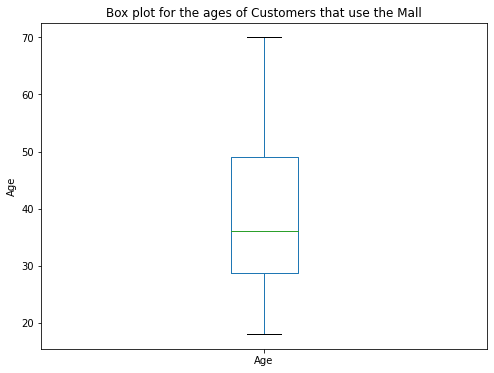

In [22]:
customer_data['Age'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot for the ages of Customers that use the Mall')
plt.ylabel('Age')

plt.show()

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70. 

Take note: From Below we have the Minimum, followed by the first Quartile, Median, Third Quartile,The Maximum and then the Outlier

# Analysis of the Annual Income of the Customers

In this section of the Python project, we will create visualizations to analyze the annual income of the customers. We will plot a histogram and then we will proceed to examine this data using a density plot.

Text(0.5, 1.0, 'Histogram for the Annual Income of Customers that use the Mall')

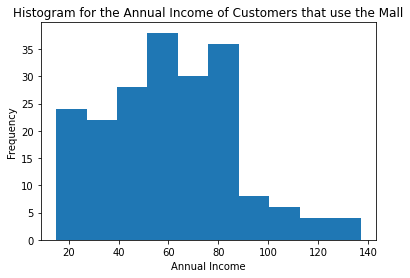

In [23]:
customer_data['Annual Income (k$)'].plot(kind="hist")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title('Histogram for the Annual Income of Customers that use the Mall')

Text(0.5, 1.0, 'Density Diagram for the Annual Income of Customers that use the Mall')

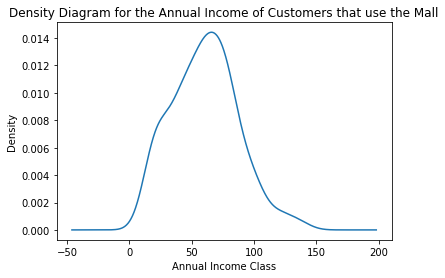

In [24]:
ax = customer_data['Annual Income (k$)'].plot.kde()
plt.xlabel("Annual Income Class")
plt.ylabel("Density")
plt.title('Density Diagram for the Annual Income of Customers that use the Mall')

From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

# Analyzing Spending Score of the Customers

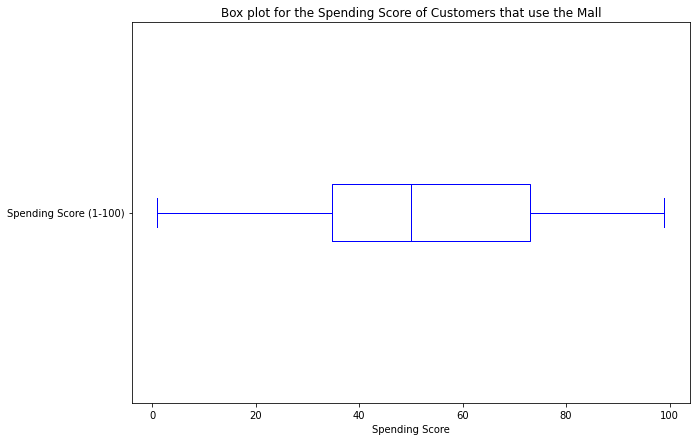

In [25]:
# horizontal box plots
customer_data['Spending Score (1-100)'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plot for the Spending Score of Customers that use the Mall')
plt.xlabel('Spending Score')

plt.show()

Text(0.5, 1.0, 'Histogram for the Spending Score of Customers that use the Mall')

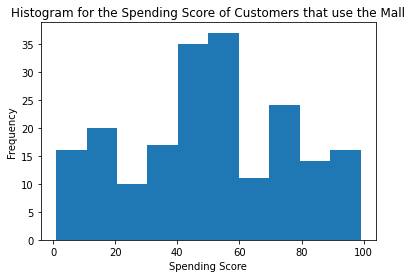

In [26]:
customer_data['Spending Score (1-100)'].plot(kind="hist")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.title('Histogram for the Spending Score of Customers that use the Mall')

The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 50 and 60 have the highest spending score among all the classes.

# K-Mean
Suppose we have N number of Unlabeled Multivariate Datasets of various Animals like Dogs, Cats, birds etc. The technique to segregate Datasets into various groups, on basis of having similar features and characteristics, is being called Clustering. The groups being Formed are being known as Clusters. Clustering Technique is being used in various Field such as Image recognition, Spam Filtering. Clustering is being used in Unsupervised Learning Algorithm in Machine Learning as it can be segregated multivariate data into various groups, without any supervisor, on basis of common pattern hidden inside the datasets.


Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.
K, here is the pre-defined number of clusters to be formed by the Algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3.

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: place a new centroid of each cluster.

Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

# K-means Algorithm
While using the k-means clustering algorithm, the first step is to indicate the number of clusters (k) that we wish to produce in the final output. The algorithm starts by selecting k objects from dataset randomly that will serve as the initial centers for our clusters. These selected objects are the cluster means, also known as centroids. Then, the remaining objects have an assignment of the closest centroid. This centroid is defined by the Euclidean Distance present between the object and the cluster mean. We refer to this step as “cluster assignment”. When the assignment is complete, the algorithm proceeds to calculate new mean value of each cluster present in the data. After the recalculation of the centers, the observations are checked if they are closer to a different cluster. Using the updated cluster mean, the objects undergo reassignment. This goes on repeatedly through several iterations until the cluster assignments stop altering. The clusters that are present in the current iteration are the same as the ones obtained in the previous iteration.

In [27]:
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [28]:
#Selecting the feature
x = customer_data.iloc[:,2:5] # 1t for rows and second for columns
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [29]:
#Clustering
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

We mentioned that we are interested in finding out commonalities among our data observations. One way to determine that commonality or similarity is through a measure of distance among the data points. The shorter the distance, the more similar the observations are. There are different ways in which we can measure that distance and one that is very familiar to a lot of people is the Euclidean distance. That’s right! The same one we are taught when learning thePythagorean theorem. 

For a dataset with n observations, we assume there are  k groups or clusters, and our aim is to determine which observation corresponds to any of those  groups. This is an important point to emphasise: the algorithm will not give us the number of clusters, instead we need to define the number k in advance. We may be able to run the algorithm with different values for k and determine the best possible solution.

In a nutshell, k-means clustering tries to minimise the distances between the observations that belong to a cluster and maximise the distance between the different clusters. In that way, we have cohesion between the observations that belong to a group, while observations that belong to a different group are kept further apart. Please note that as we explained in this post, k-means is exhaustive in the sense that every single observation in the dataset will be forced to be part of one of the  k clusters assumed.

It should now be clear where the k in k-means comes from, but what about the “means” part? Well, it turns out that as part of the algorithm we are also looking to identify the centre for each cluster. We call this a centroid, and as we assign observations to one cluster or the other, we update the position of the cluster centroid. This is done by taking the mean (average if you will) of all the data points that have been included in that cluster. Easy!

# A recipe for k-means
The recipe for k-means is quite straightforward.

Decide how many clusters you want, i.e. choose k

Randomly assign a centroid to each of the k clusters

Calculate the distance of all observation to each of the k centroids

Assign observations to the closest centroid

Find the new location of the centroid by taking the mean of all the observations in each cluster

Repeat steps 3-5 until the centroids do not change position

# Cluster Column Approach
Let us look at the observations in the dataset. We will use the Cluster column to show the different groups that are present in the dataset. Our aim will be to see if the application of the algorithm reproduces closely the groupings

In [30]:
from matplotlib.colors import ListedColormap

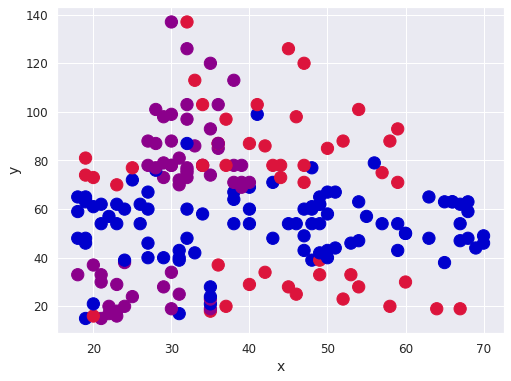

In [31]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=customer_data['Age'], y=customer_data['Annual Income (k$)'], s=150,
            c=customer_data['Spending Score (1-100)'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Steps 1 and 2 - Define k and initiate the centroids
First we need 1) to decide how many groups we have and 2) assign the initial centroids randomly. In this case let us consider k=3, and as for the centroids, well, they have to be in the same range as the dataset itself. So one option is to randomly pick k observations and use their coordinates to initialise the centroids:

In [32]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3  #I actually came back here to change from k=3 to k=4, because after the evaluation I see that k=4 is good fit
df = customer_data[['Age','Annual Income (k$)']]
centroids = initiate_centroids(k, df)
centroids

,Age,Annual Income (k$)
95,24,60
15,22,20
30,60,30


# Step 3 - Calculate distance
We now need to calculate the distance between each of the centroids and the data points. We will assign the data point to the centroid that gives us the minimum error. Let us create a function to calculate the root of square errors:

In [33]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

Let us pick a data point and calculate the error so we can see how this works in practice. We will use point , which is in fact one of the centroids we picked above. As such, we expect that the error for that point and the third centroid is zero. We therefore would assign that data point to the second centroid. Let’s take a look:

In [34]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 1000000.00
Error for centroid 1: 355216.00
Error for centroid 2: 115600.00


# Step 4 - Assign centroids
We can use the idea from Step 3 to create a function that helps us assign the data points to corresponding centroids. We will calculate all the errors associated to each centroid, and then pick the one with the lowest value for assignation

In [35]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [36]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

<ipython-input-36-e891e7f5dc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,Age,Annual Income (k$),centroid,error
0,19,15,1,1156.0
1,21,15,1,676.0
2,20,16,1,400.0
3,23,16,1,289.0
4,31,17,1,8100.0


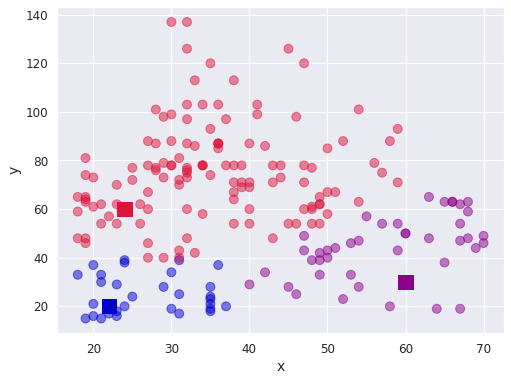

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Let us see the total error by adding all the contributions. We will take a look at this error as a measure of convergence. In other words, if the error does not change, we can assume that the centroids have stabilised their location and we can terminate our iterations. In practice, we need to be mindful of having found a local minimum (outside the scope of this post).

In [38]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 260735672.00


# Step 5 - Update centroid location
Now that we have a first attempt at defining our clusters, we need to update the position of the k centroids. We do this by calculating the mean of the position of the observations assigned to each centroid. Let take a look:

In [39]:
colnames = list(customer_data.columns[2:-1])

In [40]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,Age,Annual Income (k$)
0,35.357143,75.126984
1,26.935484,24.935484
2,57.674419,43.558140


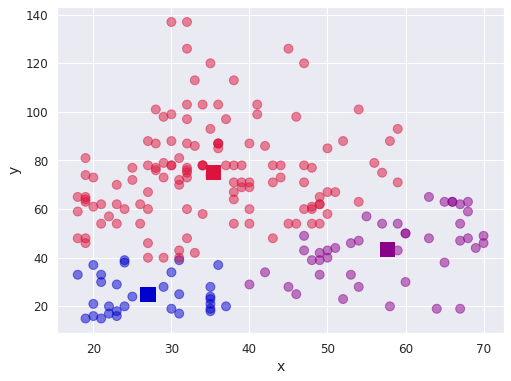

In [41]:
#We can verify that the position has been updated. Let us look again at our scatter plot:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Step 6 - Repeat steps 3-5
Now we go back to calculate the distance to each centroid, assign observations and update the centroid location. This calls for a function to encapsulate the loop:

In [179]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the orginal
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

OK, we are now ready to apply our function. We will clean our dataset first and let the algorithm run:

In [180]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Age','Annual Income (k$)']], 3)
df.head()

<ipython-input-180-b229eb7810e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'], centroids =  kmeans(df[['Age','Annual Income (k$)']], 3)


,Age,Annual Income (k$),centroid,error
0,19,15,1,128080.384842
1,21,15,1,105263.390026
2,20,16,1,95038.531402
3,23,16,1,71354.803978
4,31,17,1,46433.009482


Let us see the location of the final centroids:

In [181]:
centroids

,Age,Annual Income (k$)
0,34.347826,82.826087
1,28.360000,31.440000
2,55.034483,50.344828


And in a graphical way, let us see our clusters:

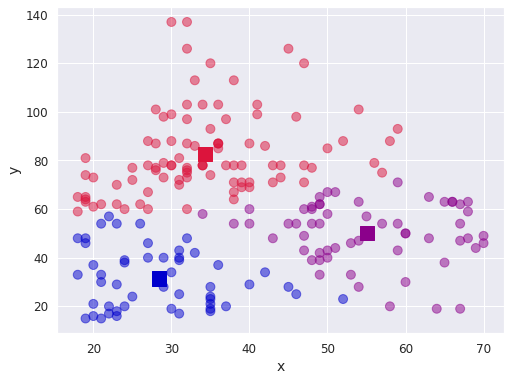

In [182]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As we can see the three groups have been obtained. In this particular example the data is such that the distinction between the groups is clear. However, we may not be as lucky in every case. So the question about how many groups there are still remains. We can use a screen plot to help us with the error minimisation by looking at running the algorithm with a sequence k=1,2,3,4...  and look for the “elbow” in the plot indicating a good number of clusters to use:



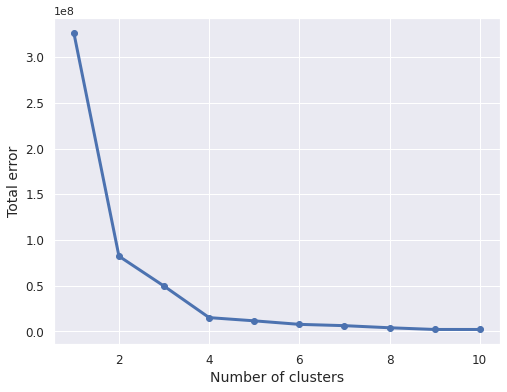

In [183]:
err_total = []
n = 10

df_elbow = customer_data[['Age','Annual Income (k$)']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can now apply the “elbow rule” which is a heuristic to help us determine the number of clusters. If we think of the line shown above as depicting an arm, then the “elbow” is the point of inflection. In this case the “elbow” is located at 4 clusters, giving us an indication that choosing 4 is a good fit.

# Summary
In this post we have explained the ideas behind the k-means algorithm and provided a simple implementation of these ideas in Python. I hope you agree that it is a very straightforward algorithm to understand and in case you want to use a more robust implementation.